In [60]:
import pandas as pd
import kagglehub

In [61]:
path = kagglehub.dataset_download("rajanand/crime-in-india")
rape_victims = pd.read_csv(f"{path}/20_Victims_of_rape.csv")
murder_victims = pd.read_csv(f"{path}/32_Murder_victim_age_sex.csv")
# cases_women = pd.read_csv(f"{path}/42_Cases_under_crime_against_women.csv")
# arrests_women = pd.read_csv(f"{path}/43_Arrests_under_crime_against_women.csv")
police_violations = pd.read_csv(f"{path}/35_Human_rights_violation_by_police.csv")
trial_periods = pd.read_csv(f"{path}/29_Period_of_trials_by_courts.csv")
violent_crime_trials = pd.read_csv(f"{path}/28_Trial_of_violent_crimes_by_courts.csv")

In [62]:
# rape_victims.info()

# Fix column names
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("- ", "_")
    )

    return df

rape_victims = clean_column_names(rape_victims)
# rape_victims.info()

In [63]:
# Check for Null data
# rape_victims.isnull().sum()

In [64]:
# Standarize Key Columns
rape_victims['victims_of_rape_total'] = pd.to_numeric(rape_victims['victims_of_rape_total'], errors='coerce').fillna(0)

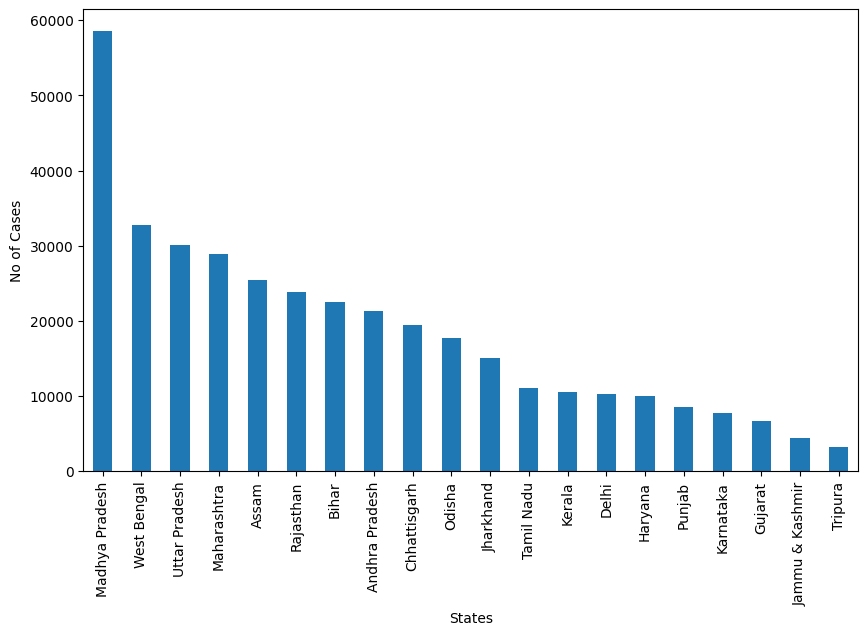

In [ ]:
# pd.group for States with Highest Rape Cases
# rape_victims.info()
top_states = rape_victims.groupby('area_name')['rape_cases_reported'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('No of Cases')
plt.show()